# Pore and Surface Diffusion Model (PSDM)

Originally developed by Michigan Technological University, coded in Python by USEPA

This can be used to model granular activated carbon (GAC) systems.

#  7 Full-scale PSDM predictions

author: Jonathan Burkhardt @UCChEJBB,
         Levi Haupert
         
PFHpA data from article: 

*Modeling PFAS Removal Using Granular Activated Carbon for Full-Scale System Design*
         
edit: Mathieu Coghe, highlighted by *//Mathieu* (Ctrl+F)

In [1]:
## Import Required Packages
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import pylab as plt

import os
srt_dir = os.getcwd()

import PSDM
os.chdir(srt_dir)

## PFHpA

In [2]:
fn = '7_Input_PFHpA.xlsx'

chem_data = PSDM.process_input_data(fn, sheet_name='Properties') 
k_data = pd.read_excel(fn, sheet_name='Kdata',index_col=0) # K & 1/n data

raw_data, column_info,\
compounds, carbons, = PSDM.process_input_file(fn,\
                                               data_sheet='data',\
                                               column_sheet='columnSpecs'
                                              )

PFHpA
EBCT:  1.57  min


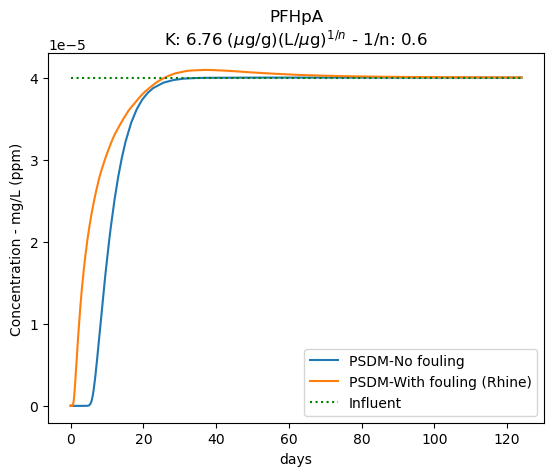

In [3]:
#//Mathieu: alternative fouling calculation:
chem_type1 = 'PFAS'
water_type1 = 'Rhine'

chem_type2 = 'Fouling alternative (15%)'
water_type2 = 'Fouling alternative (15%)'

#note additional inputs in definition of column, below.

for comp in compounds:
    print(comp)
    
    # SETTING UP PSDM simulation column
    column = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   k_data=k_data,
                   optimize=False
                   )
    
    print('EBCT: ', round(column.ebct, 2), ' min') 
    column.test_range = np.array([k_data[comp]['K']])
    column.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    #only results is used in this example
    _compound, _k, _xn, _ssqs, results = column.run_psdm_kfit(comp)
    
    column2 = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   k_data=k_data,
                   chem_type=chem_type1,
                   water_type=water_type1,
                   optimize=False
                   )
    
    column2.test_range = np.array([k_data[comp]['K']])
    column2.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    #only results is used in this example
    _compound, _k, _xn, _ssqs, results2 = column2.run_psdm_kfit(comp)
    
    column3 = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   k_data=k_data,
                   chem_type=chem_type2,
                   water_type=water_type2,
                   optimize=False
                   )
    
    column3.test_range = np.array([k_data[comp]['K']])
    column3.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    #only results is used in this example
    _compound, _k, _xn, _ssqs, results3 = column3.run_psdm_kfit(comp)    
    
    ## plotting results 
    #units are converted from ug/L to mg/L 
    plt.plot(results.index, 
             results.values/1000., 
             label='PSDM-No fouling')
    plt.plot(results2.index, 
             results2.values/1000., 
             label='PSDM-With fouling ('+water_type1+')')
    # plt.plot(results3.index, 
    #          results3.values/1000., 
    #          label='PSDM-'+water_type2,
    #          color='red')    
    (raw_data[column.influent][comp]/1000.).plot.line(label='Influent',linestyle=':',color='green')
    
    # Plot Labels, etc.
    plt.legend()
    plt.title(comp+'\nK: '+repr(round(_k,2))+' ($\mu$g/g)(L/$\mu$g)$^{1/n}$ - 1/n: '+repr(round(_xn,3)))
    plt.xlabel(column_info[carbons[0]]['time'])
    plt.ylabel('Concentration - mg/L (ppm)')
    plt.savefig(comp+'_'+carbons[0]+'_example2.png', dpi=300)
    plt.show
    
#     plt.figure()
#     plt.plot(column.K_time, 
#              column.K_mult_time, 
#              label='No fouling',
#              linewidth=4)
#     plt.plot(column2.K_time, 
#              column2.K_mult_time,
#              label='With fouling ('+water_type1+')',
#              color='darkorange')    
#     plt.plot(column3.K_time, 
#              column3.K_mult_time,
#              label=water_type2,
#              color='red')
    
#     plt.legend()
#     plt.title('Freundlich K reduction as a function of time')  # Title of the plot
#     plt.xlabel('Time')  # Label for the x-axis
#     plt.ylabel('Freundlich K reduciton (Kt/K0)')  # Label for the y-axis    
#     plt.grid(False)  # Disable grid
#     plt.show()  # Display the plot    
    
    tab2 = 'model-'+comp
    
    with pd.ExcelWriter('Example_TCE_' + carbons[0] + '_example2.xlsx') as writer:
        results.to_excel(writer, sheet_name=tab2)

In [4]:
# Column without fouling:
(column.psdm_kf,column.psdm_Dp,column.psdm_Ds)

(PFHpA    0.01223
 Name: MolarVol, dtype: float64,
 PFHpA    0.000006
 Name: MolarVol, dtype: float64,
 PFHpA    9.253253e-10
 dtype: float64)

In [5]:
# Column with fouling:
(column2.psdm_kf,column2.psdm_Dp,column2.psdm_Ds)

(PFHpA    0.01223
 Name: MolarVol, dtype: float64,
 PFHpA    0.000006
 Name: MolarVol, dtype: float64,
 PFHpA    9.253253e-20
 dtype: float64)

## TCE

In [6]:
fn = '7_Input_TCE.xlsx'

chem_data = PSDM.process_input_data(fn, sheet_name='Properties') 
k_data = pd.read_excel(fn, sheet_name='Kdata',index_col=0) # K & 1/n data

raw_data, column_info,\
compounds, carbons, = PSDM.process_input_file(fn,\
                                               data_sheet='data',\
                                               column_sheet='columnSpecs'
                                              )

Trichloroethylene
EBCT:  1.57  min


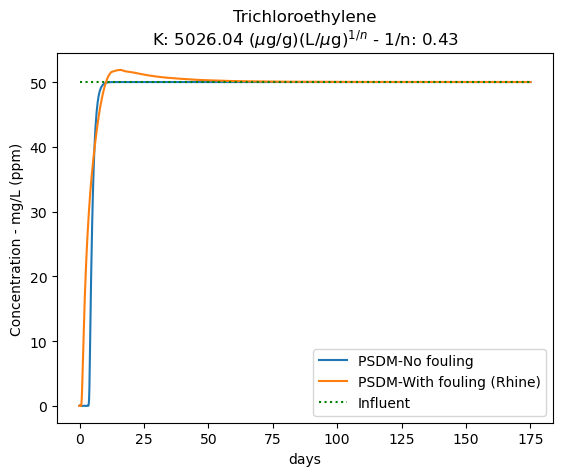

In [7]:
#//Mathieu: alternative fouling calculation:
chem_type1 = 'PFAS'
water_type1 = 'Rhine'

chem_type2 = 'Fouling alternative (15%)'
water_type2 = 'Fouling alternative (15%)'

#note additional inputs in definition of column, below.

for comp in compounds:
    print(comp)
    
    # SETTING UP PSDM simulation column
    column = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   k_data=k_data,
                   optimize=False
                   )
    
    print('EBCT: ', round(column.ebct, 2), ' min') 
    column.test_range = np.array([k_data[comp]['K']])
    column.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    #only results is used in this example
    _compound, _k, _xn, _ssqs, results = column.run_psdm_kfit(comp)
    
    column2 = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   k_data=k_data,
                   chem_type=chem_type1,
                   water_type=water_type1,
                   optimize=False
                   )
    
    column2.test_range = np.array([k_data[comp]['K']])
    column2.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    #only results is used in this example
    _compound, _k, _xn, _ssqs, results2 = column2.run_psdm_kfit(comp)
    
    column3 = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   k_data=k_data,
                   chem_type=chem_type2,
                   water_type=water_type2,
                   optimize=False
                   )
    
    column3.test_range = np.array([k_data[comp]['K']])
    column3.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    #only results is used in this example
    _compound, _k, _xn, _ssqs, results3 = column3.run_psdm_kfit(comp)    
    
    ## plotting results 
    #units are converted from ug/L to mg/L 
    plt.plot(results.index, 
             results.values/1000., 
             label='PSDM-No fouling')
    plt.plot(results2.index, 
             results2.values/1000., 
             label='PSDM-With fouling ('+water_type1+')')
    # plt.plot(results3.index, 
    #          results3.values/1000., 
    #          label='PSDM-'+water_type2,
    #          color='red')    
    (raw_data[column.influent][comp]/1000.).plot.line(label='Influent',linestyle=':',color='green')
    
    # Plot Labels, etc.
    plt.legend()
    plt.title(comp+'\nK: '+repr(round(_k,2))+' ($\mu$g/g)(L/$\mu$g)$^{1/n}$ - 1/n: '+repr(round(_xn,3)))
    plt.xlabel(column_info[carbons[0]]['time'])
    plt.ylabel('Concentration - mg/L (ppm)')
    plt.savefig(comp+'_'+carbons[0]+'_example2.png', dpi=300)
    plt.show
    
#     plt.figure()
#     plt.plot(column.K_time, 
#              column.K_mult_time, 
#              label='No fouling',
#              linewidth=4)
#     plt.plot(column2.K_time, 
#              column2.K_mult_time,
#              label='With fouling ('+water_type1+')',
#              color='darkorange')    
#     plt.plot(column3.K_time, 
#              column3.K_mult_time,
#              label=water_type2,
#              color='red')
    
#     plt.legend()
#     plt.title('Freundlich K reduction as a function of time')  # Title of the plot
#     plt.xlabel('Time')  # Label for the x-axis
#     plt.ylabel('Freundlich K reduciton (Kt/K0)')  # Label for the y-axis    
#     plt.grid(False)  # Disable grid
#     plt.show()  # Display the plot    
    
    tab2 = 'model-'+comp
    
    with pd.ExcelWriter('Example_TCE_' + carbons[0] + '_example2.xlsx') as writer:
        results.to_excel(writer, sheet_name=tab2)